## 张量

In [1]:
import torch
import numpy as np

### 创建张量

In [3]:
# 从python中创建
data = [[1, 2],[3, 4]]
x_data = torch.tensor(data)
x_data

tensor([[1, 2],
        [3, 4]])

In [5]:
# 从numpy中创建
a = np.ones(5) #[1,1,1,1,1]
b = torch.from_numpy(a)
b

tensor([1., 1., 1., 1., 1.], dtype=torch.float64)

In [6]:
# 根据现有的张量创建张量
x_ones = torch.ones_like(x_data)
print(x_ones)

x_rand = torch.rand_like(x_data, dtype=torch.float)  # 重用张量的shape和dtype
print(x_rand)

tensor([[1, 1],
        [1, 1]])
tensor([[0.8183, 0.0449],
        [0.4362, 0.4458]])


In [9]:
# 自带的随机值或常量值生成函数

shape = (2,3,)
## 生成随机张量
rand_tensor = torch.rand(shape)
## 生成全1张量
ones_tensor = torch.ones(shape)
## 生成全0张量
zeros_tensor = torch.zeros(shape)
## 生成空张量
empty_tensor = torch.empty(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}\n")
print(f"Empty Tensor: \n {empty_tensor}")

Random Tensor: 
 tensor([[0.8296, 0.5186, 0.5982],
        [0.6135, 0.0379, 0.2560]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])

Empty Tensor: 
 tensor([[5.3132e-08, 2.1669e-04, 5.3137e-08],
        [5.3131e-08, 8.5034e+20, 2.6660e-09]])


### 查看tensor的属性

In [12]:
tensor = torch.rand(3,4)
tensor.shape, tensor.size(),tensor.dtype,tensor.device

(torch.Size([3, 4]), torch.Size([3, 4]), torch.float32, device(type='cpu'))

### Tensor Operations

In [34]:
# 切片
tensor = torch.ones(4, 4)
tensor[:,1] = 0
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [15]:
# 在指定维度上拼接tensor
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])


In [ ]:
# 加法有2种方式
print(x + y)
# -------------------
print(torch.add(x, y))
# -----------------
## torch.add提供输出张量作为参数
result = torch.empty(5, 3)
torch.add(x, y, out=result)

In [36]:
# .add_ 内部加,直接内部改变了tensor
# 任何直接在原张量内部操作都是用_后固定。x.copy_(y), x.t_()
tensor.add_(5)

tensor([[6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.]])

In [37]:
# numpy切片查询
print(tensor[:, 1])

tensor([5., 5., 5., 5.])


In [38]:
# 改变tensor的形状，如tensorflow的reshape
x = torch.randn(4, 4)
y = x.view(16)
z = x.view(-1, 8)  # the size -1 is inferred from other dimensions
print(x.size(), y.size(), z.size())

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


In [39]:
# 如果张量中只有一个元素，使用.item() 将值转化为Python数字
x = torch.randn(1)
print(x)
print(x.item())

tensor([0.0872])
0.08722027391195297


In [16]:
# 元素间的点积
tensor.mul(tensor), tensor * tensor

(tensor([[1., 0., 1., 1.],
         [1., 0., 1., 1.],
         [1., 0., 1., 1.],
         [1., 0., 1., 1.]]),
 tensor([[1., 0., 1., 1.],
         [1., 0., 1., 1.],
         [1., 0., 1., 1.],
         [1., 0., 1., 1.]]))

In [17]:
# 矩阵乘法
tensor.matmul(tensor.T), tensor @ tensor.T

(tensor([[3., 3., 3., 3.],
         [3., 3., 3., 3.],
         [3., 3., 3., 3.],
         [3., 3., 3., 3.]]),
 tensor([[3., 3., 3., 3.],
         [3., 3., 3., 3.],
         [3., 3., 3., 3.],
         [3., 3., 3., 3.]]))

### CUDA Tensors

In [40]:
# 可以使用.to方法将张量移动到任何设备上
if torch.cuda.is_available():
    device = torch.device("cuda")          # a CUDA device object
    y = torch.ones_like(x, device=device)  # 直接在GPU上创建张量，或用`.to("cuda")``从CPU移到GPU上
    x = x.to(device)                       # or just use strings ``.to("cuda")``
    z = x + y
    print(z)
    print(z.to("cpu", torch.double))       # ``.to`` 把z从GPU移到CPU上,同时也可以改变dtype

#tensor([1.5084], device='cuda:0')
#tensor([1.5084], dtype=torch.float64)

### 和numpy的互换

In [23]:
# Torch Tensor==>numpy数组: .numpy()
a = torch.ones(5)
b = a.numpy()
print(type(a))
print(type(b))
print(b)

<class 'torch.Tensor'>
<class 'numpy.ndarray'>
[1. 1. 1. 1. 1.]


In [20]:
# Torch Tensor的值在内部改变了，对应转成numpy的b的值也变了
a.add_(1)
print(a)
print(b)

tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]


In [24]:
# numpy数组==>Torch Tensor: .from_numpy()
a = np.ones(5) #[1,1,1,1,1]
b = torch.from_numpy(a)
print(type(a))
print(type(b))
print(b)

<class 'numpy.ndarray'>
<class 'torch.Tensor'>
tensor([1., 1., 1., 1., 1.], dtype=torch.float64)


In [25]:
# numpy里的值改变了，对应映射的Torch Tensor值也动态改变了
np.add(a, 1, out=a)
print(a)
print(b)

[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


## autograd: 自动微分

torch.autograd 是 PyTorch 的自动微分引擎，为神经网络训练提供动力。 在本节中，您将从概念上了解 autograd 如何帮助神经网络训练

神经网络是在输入数据上执行的嵌套函数的集合。 这些函数由参数（权重和偏差组成）定义，这些参数存储在张量中。

训练神经网络分两步：

- 前向传播：在前向传播中，神经网络对正确的输出做出最好的猜测。 它通过每个函数运行输入数据来做出这个猜测。

- 反向传播：在反向传播中，神经网络根据其猜测中的误差成比例地调整其参数。 它通过从输出向后遍历，收集关于函数参数（梯度）的误差的导数，并使用梯度下降优化参数。 

让看一下单个训练步骤。 在这个例子中，我们从 torchvision 加载一个预训练的 resnet18 模型。 我们创建一个随机数据张量来表示具有 3 个channels、高度和宽度为 64 的单个图像，并将其对应的label初始化为随机值。

In [41]:
import torch, torchvision
model = torchvision.models.resnet18(pretrained=True)
data = torch.rand(1, 3, 64, 64)
labels = torch.rand(1, 1000)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to C:\Users\Administrator/.cache\torch\hub\checkpoints\resnet18-5c106cde.pth


接下来，通过模型的每一层运行输入数据来进行预测。 这是前向传播

In [42]:
prediction = model(data) # forward pass

使用模型的预测和相应的label来计算误差（损失）。 下一步是通过网络反向传播这个误差。 当在误差张量上调用 .backward() 时，反向传播就开始了。 Autograd 然后计算每个模型参数的梯度并将其存储在参数的 .grad 属性中

In [43]:
loss = (prediction - labels).sum()
loss.backward() # backward pass

接下来，使用一个优化器，SGD 的学习率为 0.01，动量为 0.9

In [44]:
optim = torch.optim.SGD(model.parameters(), lr=1e-2, momentum=0.9)

最后，调用 .step() 来启动梯度下降。 优化器通过存储在 .grad 中的梯度来调整每个参数

In [45]:
optim.step() #gradient descent

### Differentiation in Autograd

torch.Tensor是包的核心类。如果将其属性.requires_grad设置为True，它将开始跟踪其上的所有操作。完成计算后，您可以调用.backward（）并自动计算所有梯度。此张量的梯度将累积到.grad属性中。

要阻止张量跟踪历史记录，可以调用.detach（）将其从计算历史中分离出来，防止将来的计算被追踪。

要防止跟踪历史记录（和使用内存），您还可以使用torch.no_grad（）包装代码块：在评估模型时，这可能特别有用，因为模型可能具有requires_grad = True的可训练参数，但我们不需要梯度

Tensor和Function互相连接并构建一个非循环图，它编码完整的计算历史。每个张量都有一个.grad_fn属性，该属性引用已创建Tensor的Function（除了用户创建的Tensors - 他们的grad_fn为None）

如果要计算导数，可以在Tensor上调用.backward（）。如果Tensor是标量（即它包含一个元素数据），则不需要为backward（）指定任何参数，但是如果它有更多元素，则需要指定gradient参数，该参数为同shape的张量

In [46]:
# 创建张量a和b并设置requires_grad = True以跟踪它的计算
a = torch.tensor([2., 3.], requires_grad=True)
b = torch.tensor([6., 4.], requires_grad=True)

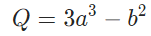

In [47]:
Q = 3*a**3 - b**2

求梯度
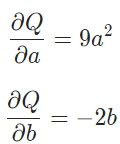
然后对Q调用.backward()，由于Q不是标量
需要在 Q.backward() 中显式地传递一个gradient参数，该参数是一个是与 Q 形状相同的张量，代表Q本身的梯度
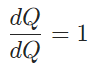

In [48]:
external_grad = torch.tensor([1., 1.])
Q.backward(gradient=external_grad)

梯度现在存放在 a.grad 和 b.grad,检查收集的梯度是否正确

In [49]:
print(9*a**2 == a.grad)
print(-2*b == b.grad)

tensor([True, True])
tensor([True, True])


自定义张量的requires_grad属性默认为False,可以通过.requires_grad_(True)方法外部修改它

In [50]:
a = torch.randn(2, 2)
print(a.requires_grad)

a.requires_grad_(True)
print(a.requires_grad)

False
True


对标量调用.backward()

In [52]:
x = torch.ones(2, 2, requires_grad=True)
y = x + 2
z = y * y * 3  # z = 3(x+2)^2
out = z.mean()
print(out)
# out是只有1个值的标量，out.backward() 等同于out.backward(torch.tensor(1.))
out.backward()

# 梯度 d(out)/dx
print(x.grad)

tensor(27., grad_fn=<MeanBackward0>)
tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


### 阻止梯度计算：torch.no_grad()

In [53]:
# 一个requires_grad=True的Tensor，可以通过包装torch.no_grad()阻止梯度自动计算
print(x.requires_grad)
print((x ** 2).requires_grad)

with torch.no_grad():
    print((x ** 2).requires_grad)

True
True
False


需要梯度的张量和不需要梯度的张量进行操作，输出结果的张量是需要梯度

In [54]:
x = torch.rand(5, 5)
y = torch.rand(5, 5)
z = torch.rand((5, 5), requires_grad=True)

a = x + y
print(f"Does `a` require gradients? : {a.requires_grad}")
b = x + z
print(f"Does `b` require gradients?: {b.requires_grad}")

Does `a` require gradients? : False
Does `b` require gradients?: True


在神经网络中，不计算梯度的参数通常称为冻结参数。 如果事先知道不需要某些参数的梯度，则“冻结”模型的一部分很有用（通过减少 autograd 计算提高性能优势）。

另一个常见用例是对预训练网络进行微调。在微调中，冻结了大部分模型，通常只修改分类器层以对新标签进行预测。 让我们通过一个小例子来演示这一点

In [56]:
#加载一个预训练的 resnet18 模型，并冻结所有参数
from torch import nn, optim

model = torchvision.models.resnet18(pretrained=True)

# Freeze all the parameters in the network
for param in model.parameters():
    param.requires_grad = False

假设我们要在具有 10 个label的新数据集上微调模型。 在resnet中，分类器是最后一个线性层model.fc。 可以简单地用一个新的线性层（默认情况下未冻结）替换它作为我们的分类器

In [57]:
model.fc = nn.Linear(512, 10)

现在模型中除了model.fc 的参数之外的所有参数都被冻结了。 计算梯度的唯一参数是 model.fc 的权重和偏差

In [58]:
# Optimize only the classifier
optimizer = optim.SGD(model.parameters(), lr=1e-2, momentum=0.9)

请注意，尽管在优化器中注册了所有参数，但计算梯度（之后在梯度下降中更新）的唯一参数是分类器的权重和偏差。

## 神经网络

可以使用torch.nn包构建神经网络。

nn依赖于autograd来定义模型并区分它们。 nn.Module包含layers，以及返回输出的forward(input)方法。

它是一个简单的前馈网络。 它接受输入，一层接一层，然后最终给出输出

神经网络的典型训练程序如下：  
定义具有一些可学习参数（或权重）的神经网络  
迭代输入数据集  
通过网络处理输入  
计算损失（输出距离正确多远）  
将梯度传播回给网络参数  
通常使用简单的更新规则更新网络权重：weight = weight - learning_rate * gradient

In [60]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)  # 1 input image channel, 6 output channels, 5x5 正方形 convolution kernel
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)  # an affine operation: y = Wx + b
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))  # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)  # If the size is a 正方形 you can only specify a single number
        x = x.view(-1, self.num_flat_features(x))  #reshape
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features


net = Net()
net

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


您只需定义forward函数，当使用autograd时backward函数(计算梯度)会被自动定义。 可以在forward函数中使用任何Tensor操作。

模型的可学习参数通过 net.parameters()返回

In [61]:
params = list(net.parameters())
print(len(params))
print(params[0].size())  # conv1's .weight

10
torch.Size([6, 1, 5, 5])


尝试一个随机的32x32输入。 注意：此网络（LeNet）要求输入大小为32x32。 要在MNIST数据集上使用此网络，请将数据集中的图像调整为32x32

In [62]:
input = torch.randn(1, 1, 32, 32)
out = net(input)
print(out)

tensor([[ 0.0174,  0.0583, -0.1971, -0.0890, -0.0028, -0.1154, -0.0522,  0.1136,
          0.0075, -0.0320]], grad_fn=<AddmmBackward>)


将所有参数的梯度缓存置0，反向传播采用随机梯度

In [63]:
net.zero_grad()
out.backward(torch.randn(1, 10))

torch.nn包只支持小批量样本的输入，而不是单个样本。

例如，nn.Conv2d将采用4D张量的nSamples x nChannels x Height x Width。

如果只有一个样本，只需使用input.unsqueeze(0)变成假批量维度

### 回顾
torch.Tensor - 支持autograd操作（如backward（））的多维数组。  
nn.Module - 神经网络模块。包含形成深度神经网络构建的各种模块和损失函数。，帮助将它们转移到GPU，导出，加载等。  
nn.Parameter - 一种Tensor，在被指定为Module的属性时自动注册为参数。  
autograd.Function - 实现autograd操作的forward 和backward定义。每个Tensor操作都会创建至少一个Function节点，该节点连接到创建Tensor并对其历史进行编码的函数。  

### 已完成
定义网络结构  
处理输入和调用反向传播

### 未完成
计算损失  
更新网络权重

### 损失函数
nn包下有几种不同的损失函数。 一个简单的损失是：nn.MSELoss计算输入和目标之间的均方误差

In [64]:
output = net(input)
target = torch.randn(10)  # a dummy target, for example
target = target.view(1, -1)  # make it the same shape as output
criterion = nn.MSELoss()

loss = criterion(output, target)
print(loss)

tensor(0.6758, grad_fn=<MseLossBackward>)


使用.grad_fn 属性追踪反向传播方向的损失，如下所示:  
input -> conv2d -> relu -> maxpool2d -> conv2d -> relu -> maxpool2d  
-> view -> linear -> relu -> linear -> relu -> linear  
-> MSELoss  
-> loss

当调用loss.backward()时，整个graph 被区分为w.r.t. 损失，图中所有具有requires_grad = True的张量将使用梯度累积的.grad张量

In [65]:
print(loss.grad_fn)  # MSELoss
print(loss.grad_fn.next_functions[0][0])  # Linear
print(loss.grad_fn.next_functions[0][0].next_functions[0][0])  # ReLU

### Backprop
要反向传播误差，只要做loss.backward()。 需要清除已存在梯度，否则梯度将累积到已存在梯度  
现在将调用loss.backward()，并查看conv1在backward之前和之后的bias梯度。

In [66]:
net.zero_grad()  # zeroes the gradient buffers of all parameters

print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)

loss.backward()

print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

conv1.bias.grad before backward
tensor([0., 0., 0., 0., 0., 0.])
conv1.bias.grad after backward
tensor([ 0.0119,  0.0026,  0.0045, -0.0010,  0.0194,  0.0116])


### 更新权重

实践中使用的最简单的更新规则是随机梯度下降（SGD）  
weight = weight - learning_rate * gradient

In [68]:
learning_rate = 0.01
for f in net.parameters():
    f.data.sub_(f.grad.data * learning_rate)

当使用神经网络时，希望使用各种不同的更新规则，例如SGD，Nesterov-SGD，Adam，RMSProp等。为了实现这一点，我们构建了一个小包：torch.optim，它实现了所有这些方法。

In [69]:
import torch.optim as optim

# create your optimizer
optimizer = optim.SGD(net.parameters(), lr=0.01)

# 在训练环节:
optimizer.zero_grad()   # zero the gradient buffers
output = net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step()    # Does the update

观察如何使用optimizer.zero_grad()手动将梯度缓冲区设置为零。 这是因为梯度是按Backprop中的说明累积的

## 训练一个分类器

数据可以用python包加载成numpy array，再转化成torch.*Tensor  
专门针对视觉，我们创建了一个名为torchvision的软件包，它包含用于常见数据集的数据加载器，如Imagenet，CIFAR10，MNIST等，以及用于图像的数据转换器，即torchvision.datasets和torch.utils.data.DataLoader。  
CIFAR-10数据集： size 3x32x32 10类：‘airplane’, ‘automobile’, ‘bird’, ‘cat’, ‘deer’, ‘dog’, ‘frog’, ‘horse’, ‘ship’, ‘truck’  

训练图像分类器,将按顺序执行以下步骤：

使用torchvision加载和标准化CIFAR10训练和测试数据集  
定义卷积神经网络  
定义损失函数  
在训练数据上训练网络  
在测试数据上测试网络

In [70]:
import torch
import torchvision
import torchvision.transforms as transforms

### 使用torchvision加载CIFAR-10
torchvision数据集的输出是范围[0,1]的PILImage图像。 我们将它们转换为归一化范围的张量[-1,1]

In [71]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Extracting ./data\cifar-10-python.tar.gz to ./data
Files already downloaded and verified



显示一些训练集看看

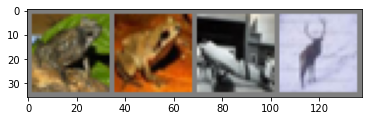

 frog  frog plane  deer


In [73]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

### 定义卷积神经网络

In [74]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)  # 将前面的神经网络从1-channel改成3-channel
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5) # 第一个nn.Conv2d的参数2和第二个nn.Conv2d的参数1，数字要相同
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

### 定义代价函数和优化器

In [75]:
# 使用Classification Cross-Entropy loss and SGD with momentum
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

### 训练
只需循环遍历数据迭代器，将输入提供给网络并进行优化

In [76]:
for epoch in range(2):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        
        inputs, labels = data  # get the inputs

        optimizer.zero_grad()  # zero the parameter gradients

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.175
[1,  4000] loss: 1.843
[1,  6000] loss: 1.674
[1,  8000] loss: 1.589
[1, 10000] loss: 1.513
[1, 12000] loss: 1.491
[2,  2000] loss: 1.395
[2,  4000] loss: 1.384
[2,  6000] loss: 1.370
[2,  8000] loss: 1.328
[2, 10000] loss: 1.319
[2, 12000] loss: 1.294
Finished Training


快速保存训练模型

In [77]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

### 在测试集上测试
已经训练了2个epoch,此时需要测试一下到底结果如何  
通过对比神经网络给出的分类和已知的类别结果，可以得出正确与否，如果预测的正确，则可以将样本加入正确预测的结果的列表中。  
第一步，从测试集中展示几张照片来熟悉一下

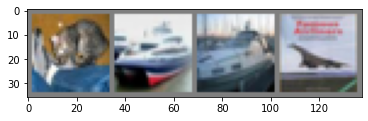

GroundTruth:    cat  ship  ship plane


In [78]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

现在看看神经网络认为上面这些例子是什么

In [79]:
outputs = net(images)

输出是10类的概率。 一个类的概率越高，网络认为图像是这个类的越多。 那么，让我们得到最高概率的索引

In [80]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(4)))

Predicted:    cat  ship   car plane


神经网络在整个测试集上的表现

In [81]:
correct = 0
total = 0
# 不是训练模式，没必要计算梯度
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)  # calculate outputs by running images through the network
        _, predicted = torch.max(outputs.data, 1)  # the class with the highest energy is what we choose as prediction
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 10000 test images: 54 %


看起来好于运气--10％的准确性（从10个类中随机挑选一个类）。 似乎网络学到了一些东西  
下面看哪些类分的好，哪些类分的不好

In [86]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}


with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print("Accuracy for class {:5s} is: {:.1f} %".format(classname, accuracy))

Accuracy for class plane is: 61.2 %
Accuracy for class car   is: 67.3 %
Accuracy for class bird  is: 43.9 %
Accuracy for class cat   is: 37.4 %
Accuracy for class deer  is: 36.5 %
Accuracy for class dog   is: 30.8 %
Accuracy for class frog  is: 64.5 %
Accuracy for class horse is: 61.8 %
Accuracy for class ship  is: 69.5 %
Accuracy for class truck is: 72.2 %


### 在GPU上训练
就像将Tensor转移到GPU上一样，将神经网络转移到GPU上。  
首先定义可用的CUDA设备

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

下面的方法将遍历所有模块，将他们的参数和缓存转移到CUDA设备  
记得每一步的输入和label也要转移到GPU

In [ ]:
net.to(device)
inputs, labels = inputs.to(device), labels.to(device)

练习：尝试增加网络的宽度（第一个nn.Conv2d的参数2和第二个nn.Conv2d的参数1 - 它们需要是相同的数字），看看你获得了什么样的加速

## 数据并行-使用多GPU
通过 DataParallel使用多 GPUs

In [ ]:
# 将模型放在GPU上
device = torch.device("cuda:0")
model.to(device)

# 将tensor放在GPU上
mytensor = my_tensor.to(device)

请注意，调用my_tensor.to（device）是在GPU上返回my_tensor的新副本，而不是重写my_tensor。需要将其分配给新的张量并在GPU上使用该张量

在多个GPU上执行前向/反向传播是很自然的。 但是Pytorch默认只使用一个GPU。 通过使用DataParallel使模型并行运行，可以在多个GPU上运行操作

model = nn.DataParallel(model)

### 示例

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

# Parameters and DataLoaders
input_size = 5
output_size = 2

batch_size = 30
data_size = 100

In [ ]:
# 定义设备
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
# 生成一个假数据集，只需实现__getitem__
class RandomDataset(Dataset):

    def __init__(self, size, length):
        self.len = length
        self.data = torch.randn(length, size)

    def __getitem__(self, index):
        return self.data[index]

    def __len__(self):
        return self.len

rand_loader = DataLoader(dataset=RandomDataset(input_size, data_size), batch_size=batch_size, shuffle=True)

简单模型示例：input-linear-output  
在模型中放置了一个print语句来监视输入和输出张量的大小。 请注意第0批次打印的内容

In [ ]:
class Model(nn.Module):
    # Our model

    def __init__(self, input_size, output_size):
        super(Model, self).__init__()
        self.fc = nn.Linear(input_size, output_size)

    def forward(self, input):
        output = self.fc(input)
        print("\tIn Model: input size", input.size(), "output size", output.size())

        return output

本教程的**核心**部分：  
首先，需要创建一个模型实例并检查我们是否有多个GPU。 如果有多个GPU，可以使用nn.DataParallel包装我们的模型。 然后通过model.to(device)将模型放在GPU上

In [ ]:
model = Model(input_size, output_size)
if torch.cuda.device_count() > 1:
    print("Let's use", torch.cuda.device_count(), "GPUs!")
    # dim = 0 [30, xxx] -> [10, ...], [10, ...], [10, ...] on 3 GPUs
    model = nn.DataParallel(model)

model.to(device)
# Let's use 2 GPUs!

In [ ]:
# input and output tensors的size
for data in rand_loader:
    input = data.to(device)
    output = model(input)
    print("Outside: input size", input.size(), "output_size", output.size())

```
on 2 GPUs
Let's use 2 GPUs!
    In Model: input size torch.Size([15, 5]) output size torch.Size([15, 2])
    In Model: input size torch.Size([15, 5]) output size torch.Size([15, 2])
Outside: input size torch.Size([30, 5]) output_size torch.Size([30, 2])
    In Model: input size torch.Size([15, 5]) output size torch.Size([15, 2])
    In Model: input size torch.Size([15, 5]) output size torch.Size([15, 2])
Outside: input size torch.Size([30, 5]) output_size torch.Size([30, 2])
    In Model: input size torch.Size([15, 5]) output size torch.Size([15, 2])
    In Model: input size torch.Size([15, 5]) output size torch.Size([15, 2])
Outside: input size torch.Size([30, 5]) output_size torch.Size([30, 2])
    In Model: input size torch.Size([5, 5]) output size torch.Size([5, 2])
    In Model: input size torch.Size([5, 5]) output size torch.Size([5, 2])
Outside: input size torch.Size([10, 5]) output_size torch.Size([10, 2])
```

DataParallel自动拆分数据并将任务指令发送到多个GPU上的多个模型。 在每个模型完成其任务后，DataParallel会在结果返回给您前收集和合并结果